## Multiple Linear Regression

In [1]:
# y = b0 + b1*x1 + b2*x2 + b3*x3 + ......... multiple linear regression

## Import library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (15, 9)
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation EDA

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


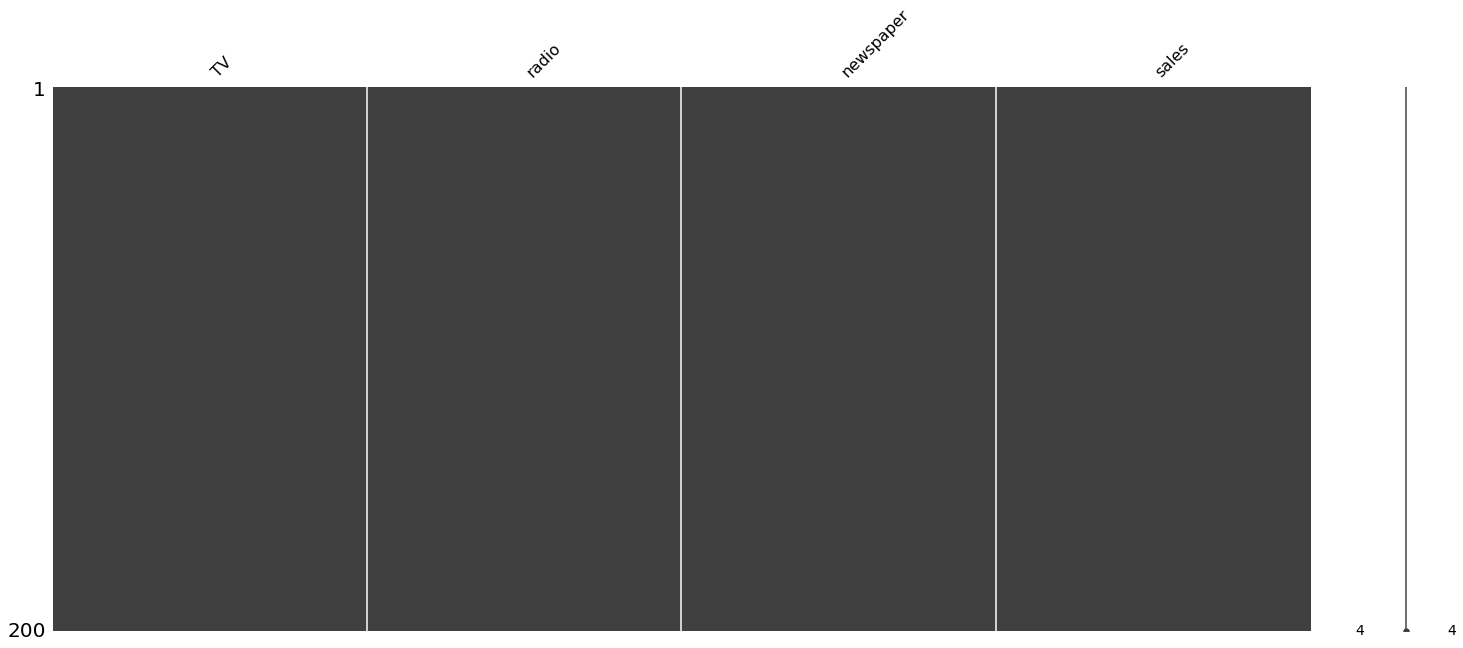

In [6]:
import missingno as msno

msno.matrix(df);

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.sort_values(by = "sales" , ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [9]:
print(np.mean([100,110,120,115]))
print(np.std([100 , 110 , 120 , 115])) # std is low because values near.

111.25
7.39509972887452


In [10]:
print(np.mean([100,110,120,800]))
print(np.std([100 , 110 , 120 , 800])) # std is too much, near to mean. That means there may be an outlier.

282.5
298.8624265443885


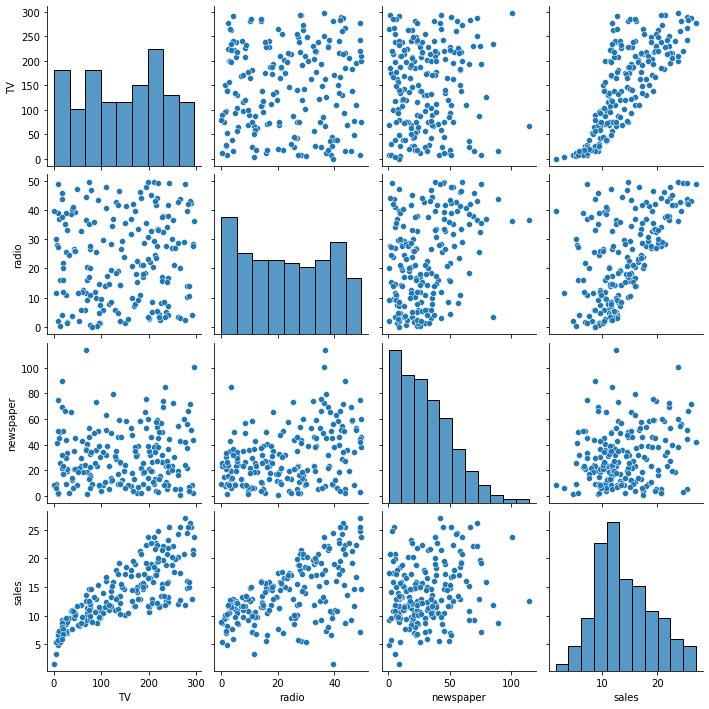

In [11]:
sns.pairplot(df);

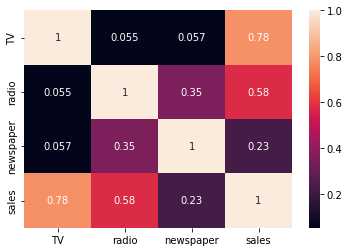

In [12]:
sns.heatmap(df.corr() , annot=True);

![](2022-09-10-18-58-56.png)

In [13]:
from scipy.stats import skew

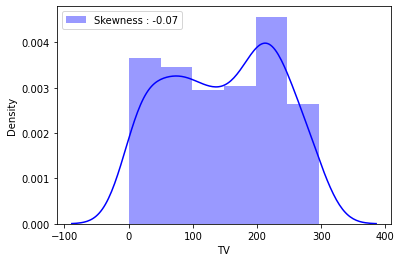

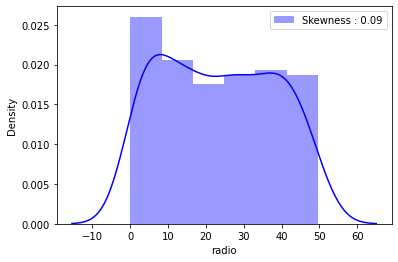

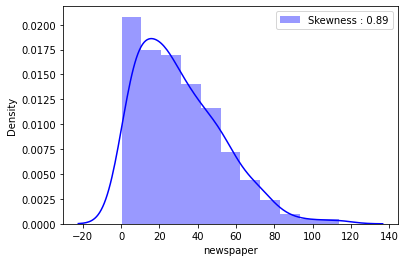

In [14]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

## Train - Test Split

In [15]:
# 1000 e kadar % 20/30 test , % 80/70 train
# 1000 ile 100000 satır arasında %10/20 test , %90/80 train
# 100000 ile 100000000 satır arasında %5 test , %95 train
# 100000000 üzeri satırlık datada %1 test , % 99 train

In [16]:
X = df.drop("sales" , axis = 1)
y = df["sales"]

print(X , y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 42)

![](2022-09-10-19-39-43.png)

In [19]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [89]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [21]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train , y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [26]:
lr.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [27]:
lr.intercept_

2.7089490925159065

In [91]:
# y_pred_manual = sum([X_test] * lr.coef_ ) + lr.intercept_ # This is so important. I'll fix it.

# y_pred_manual

array([[ 9.90382967,  9.00643399,  3.07303082],
       [11.31813259, 12.21496269,  3.07303082],
       [15.61391248,  8.34878525,  3.00627103],
       [ 3.22444268, 10.06265773,  3.02003593],
       [12.41520869, 12.47403644,  2.73097294],
       [ 6.01780109,  9.68401148,  3.07165432],
       [12.2610012 , 11.45767021,  2.89615179],
       [ 4.91191314,  5.02068406,  2.83558621],
       [12.50773318,  3.38652658,  2.79910922],
       [10.42372919,  7.19291777,  2.92574634],
       [ 4.09681644,  7.61142152,  2.72409049],
       [ 5.18508068,  3.84488782,  2.91335792],
       [13.04085048,  3.38652658,  3.29258104],
       [ 2.94686921,  8.66764525,  2.77364414],
       [ 8.85521879,  3.12745284,  2.89202232],
       [10.20783871,  4.26339157,  2.95121141],
       [ 3.03058184,  8.30892776,  2.99388261],
       [11.41506301,  7.35234777,  2.80667991],
       [ 6.02661295,  6.75448528,  2.93262879],
       [13.16862239,  8.18935526,  2.78465607],
       [12.82055407,  9.14593524,  3.219

In [29]:
# df.iloc[:,0] TV column

In [30]:
# np.polyfit(X, y , deg=3) # I'll look that.

## y_preds = b1 * TV + b2 * radio + b3 * newspaper + b0

In [ ]:
# b1,b2,b3 = lr.coef_
# b0 = lr.intercept_
# y_preds = b0 + b1 * TV + b2 * radio + b3 * newspaper

In [31]:
sum(X_test.loc[95] * lr.coef_) + lr.intercept_ # Manual predicts for multiple linear regression. We predicted 95.index's y value.

16.565396297434837

In [32]:
my_dict = {'Actual ' : y_test , 'Preds' : y_pred , 'residual' : y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head()

,Actual,Preds,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680


In [34]:
result_sample = compare.sample(15)
result_sample

,Actual,Preds,residual
137,20.8,20.938265,-0.138265
173,11.7,11.631569,0.068431
115,12.6,13.355569,-0.755569
152,16.6,16.156193,0.443807
29,10.5,9.288938,1.211062
30,21.4,21.551071,-0.151071
104,20.7,20.075908,0.624092
60,8.1,5.611980,2.488020
69,22.3,21.196925,1.103075
96,11.7,12.153176,-0.453176


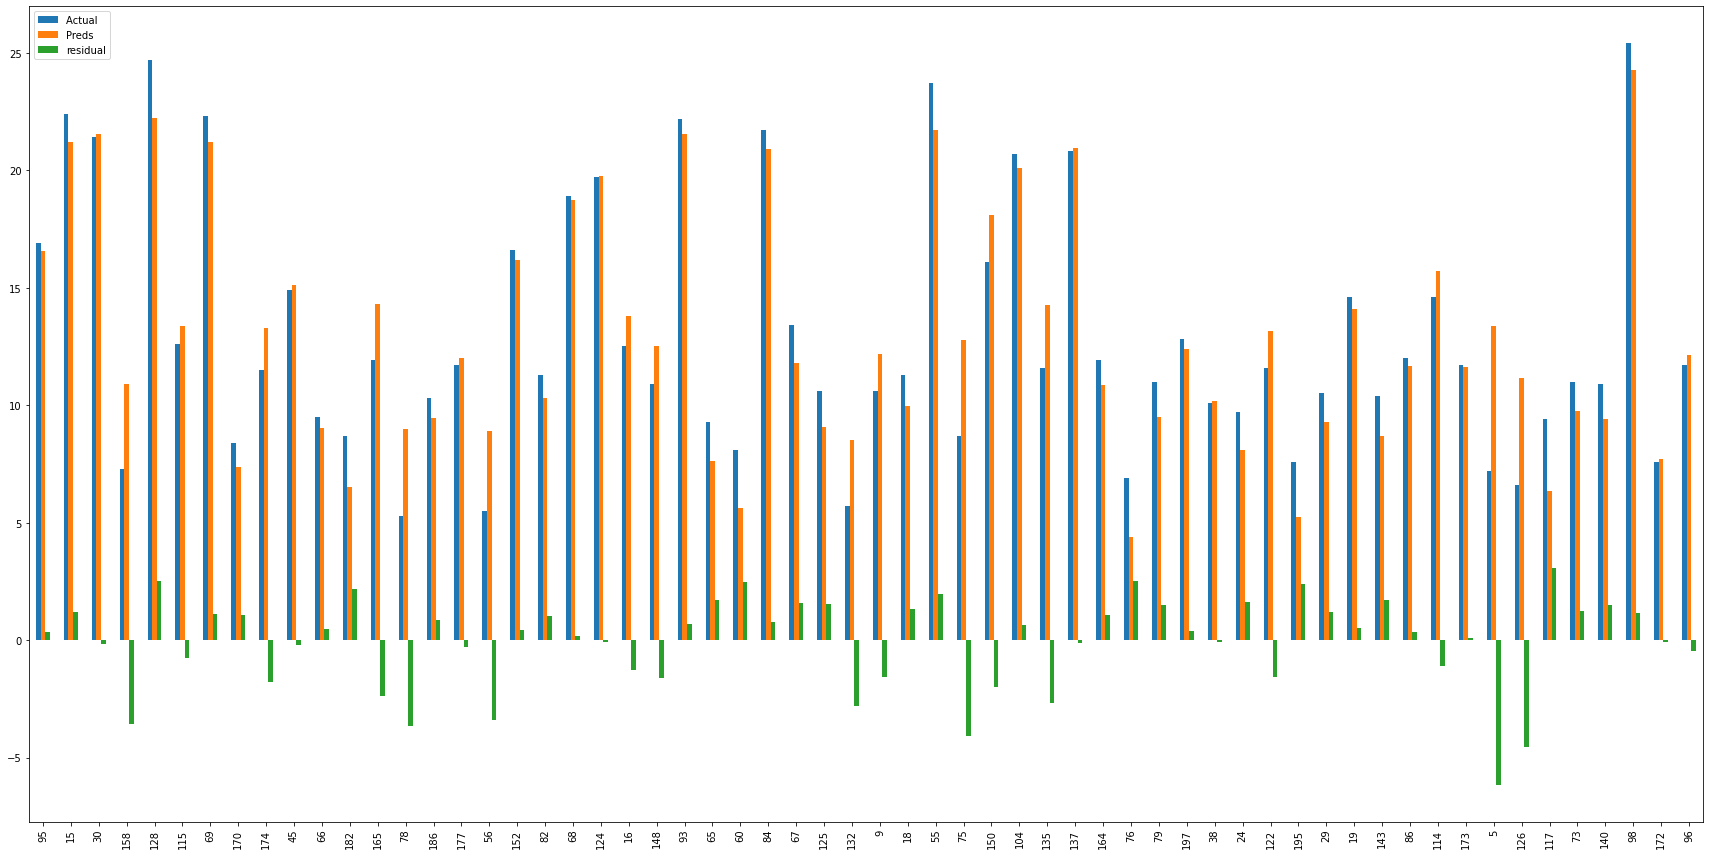

In [35]:
compare.plot(kind = "bar" , figsize = (30,15) );

In [36]:
print(compare[compare["residual"] > 0 ].count()[0]) # Positive errors count
print(compare[compare["residual"] < 0 ].count()[0]) # Nagative errors count

35
25


## Error Metrics

In [37]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [38]:
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))

In [39]:
print(f"""
      r2 score : {r2}
      mean absolute error : {mae}
      mean squared error : {mse}
      root mean squared error : {rmse}
      """)


      r2 score : 0.8609466508230368
      mean absolute error : 1.5116692224549086
      mean squared error : 3.79679723671522
      root mean squared error : 1.9485372043446387
      


In [40]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [41]:
mae / sales_mean # Mae say that your model have average % 10 wrong than truth.

0.10780311802138767

In [42]:
rmse / sales_mean # Rmse say that your model have average % 13.8 wrong than truth.

0.138957903679418

## Adjusted R2 Score

In [43]:
r2_score(y_test,y_pred)

0.8609466508230368

In [44]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [45]:
adj_r2(y_test,y_pred,df)

0.8588182832335934

In [46]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [47]:
adj_r2(y_test, y_pred, df)

0.7204887223614578

In [ ]:
# If we give 100 independent variables without increase observations its going worse. R2 may be good but adj r2 will be bad.

## What is the concept of punishment for RMSEA error metric?

In [48]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} ## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 5800 yaptım.

In [49]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [50]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [51]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [52]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [53]:
sum(df_2["residual"]) / 5 # mae = 200

200.0

In [54]:
np.sqrt(sum((df_2.Actual-df_2.pred)**2) / 5) # rmse = 209

209.76176963403032

In [55]:
sum(df_3["residual"]) / 5 # mae = 300

300.0

In [56]:
np.sqrt(sum((df_3.Actual-df_3.pred)**2) / 5) # rmse = 392

392.42833740697165

In [57]:
# rmse punished more.

## Evaluation Model

In [58]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [59]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [60]:
y_train_pred = lr.predict(X_train)

In [61]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072526
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

In [62]:
# If residuals have normal distribution so we can say that its suitable for linear regression.

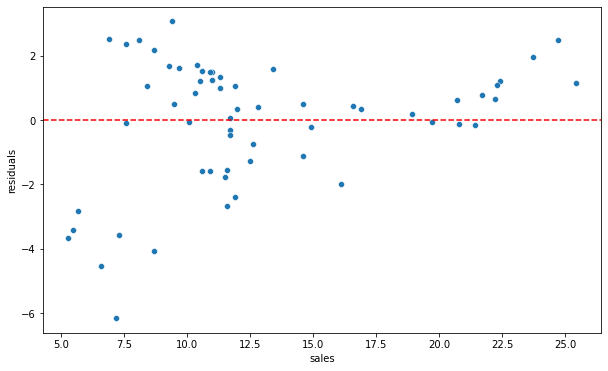

In [64]:
residuals = y_test - y_pred

plt.figure(figsize= (10,6))

sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line

plt.ylabel("residuals")

plt.show()

In [65]:
# Residuals like normal distribution if you look from right. So we can use linear regression. Let see it better with kdeplot

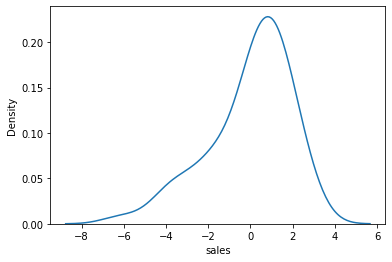

In [66]:
sns.kdeplot(residuals); # You can see the normal distribution now easily.

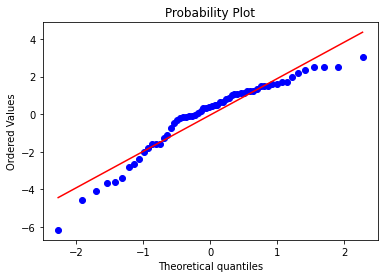

In [67]:
stats.probplot(residuals , dist = "norm" , plot= plt); # Its also good. You can see normal distribution.

In [68]:
skew(residuals) # If -1 < x < 1 so there is normal distribution.

-0.9865673346742722

In [69]:
from yellowbrick.regressor import ResidualsPlot

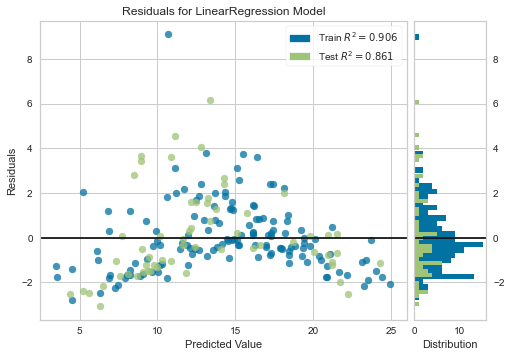

In [70]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   ;              # Finalize and render the figure

In [71]:
from yellowbrick.regressor import PredictionError

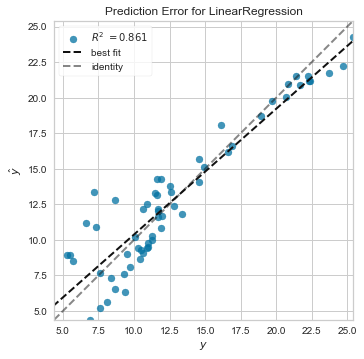

In [72]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Retraining Model on Full Data

In [73]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [74]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [75]:
final_model.intercept_

2.938889369459412

In [76]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [77]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## New predicts on new data

In [78]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [79]:
adv = [[150,20,15]]
adv

[[150, 20, 15]]

In [80]:
final_model.predict(adv)

array([13.55862413])

In [81]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [82]:
final_model.intercept_

2.938889369459412

In [83]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # We get manuel predict with new data.

13.558624130495996

In [84]:
adv_2 = [[150, 20, 15], [160, 20, 15]] # Two data

In [85]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

## The effect of features on the predicted label